<a href="https://colab.research.google.com/github/analyst-rhie/self-taught_machine_learning_code/blob/main/9%EC%9E%A5.%20%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [2]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target= train_test_split(train_input, train_target, test_size=0.2, random_state =42)

In [3]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [10]:
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [11]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


Text(0, 0.5, 'frequency')

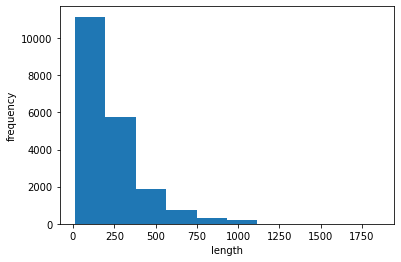

In [12]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [18]:
print(train_seq.shape)
print(train_seq[0])

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [21]:
train_seq = pad_sequences(train_input, maxlen =100, truncating = 'post')

In [12]:
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
train_oh = keras.utils.to_categorical(train_seq)

In [39]:
train_oh.shape

(20000, 100, 500)

In [41]:
np.sum(train_oh[0][0])

1.0

In [14]:
val_oh = keras.utils.to_categorical(val_seq)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplearnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size = 64, validation_data = (val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 38ms/step - loss: 0.6816 - accuracy: 0.5608 - val_loss: 0.6761 - val_accuracy: 0.5748
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6587 - accuracy: 0.6134 - val_loss: 0.6526 - val_accuracy: 0.6224
Epoch 3/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6386 - accuracy: 0.6425 - val_loss: 0.6355 - val_accuracy: 0.6432
Epoch 4/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6190 - accuracy: 0.6676 - val_loss: 0.6189 - val_accuracy: 0.6628
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5988 - accuracy: 0.6912 - val_loss: 0.5994 - val_accuracy: 0.6850
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.5793 - accuracy: 0.7078 - val_loss: 0.5858 - val_accuracy: 0.6938
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5613 - accuracy: 0.7253 - val_loss: 0.5657 - val_ac

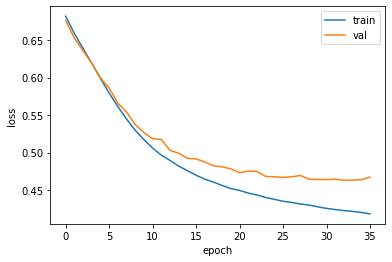

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [21]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation ='sigmoid'))

In [23]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs = 100 , batch_size = 64, validation_data = (val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6765 - accuracy: 0.5706 - val_loss: 0.6462 - val_accuracy: 0.6304
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6118 - accuracy: 0.6852 - val_loss: 0.5964 - val_accuracy: 0.7136
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5750 - accuracy: 0.7285 - val_loss: 0.5841 - val_accuracy: 0.7104
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5532 - accuracy: 0.7480 - val_loss: 0.5615 - val_accuracy: 0.7314
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5370 - accuracy: 0.7605 - val_loss: 0.5401 - val_accuracy: 0.7528
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5224 - accuracy: 0.7714 - val_loss: 0.5314 - val_accuracy: 0.7562
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5097 - accuracy: 0.7789 - val_loss: 0.5184 - val_accuracy:

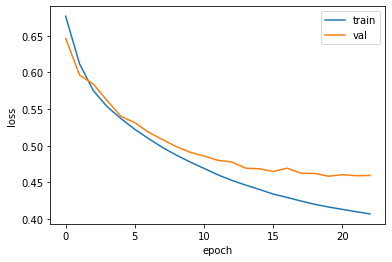

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])